# Atividade 2 - Série de Fourier
## Parte Computacional

Item a) Coeficientes $a_k$ da série de Fourier da onda $x(t)$, dados por:

$a_k =
\begin{cases}
    0, & k = 0 \\
    \dfrac{7 \sin\left(\frac{2 k \pi}{7}\right) + 2 k \pi \cos\left(\frac{2 k \pi}{7}\right) \left(1 - 2 \cos\left(\frac{2 k \pi}{7}\right) \right)}{2 j k^2 \pi^2}, & k \neq 0
\end{cases}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T = 7
omega_0 = 2 * np.pi / T
a_0 = 0
t = np.linspace(-(T/2), (T/2), 10_000)

Item b) Aproximação da onda $x(t)$ pela série de Fourier truncada, com as harmônicas de índices $-N$ a $N$, em que $N = {1, 10, 20, 50}$.

In [2]:
def x_original(t):
    x = np.zeros_like(t)
    x[(t >= -2) & (t < -1)] = -1
    x[(t >= -1) & (t < 0)] = t[(t >= -1) & (t < 0)] + 1
    x[(t >= 0) & (t < 1)] = t[(t >= 0) & (t < 1)] - 1
    x[(t >= 1) & (t < 2)] = 1
    return x

x_t = x_original(t)

In [3]:
def x_fourier(t, N):
    x = 0
    for k in range(-N, N+1):
        if k == 0:
            a_k = a_0
        else:
            a_k = (1/T) * (-2j *(np.sin(k*omega_0) + k*omega_0*np.cos(k*omega_0)*(1-2*np.cos(k*omega_0)))) / (k * omega_0)**2
        x += a_k * np.exp(1j * k * omega_0 * t)
    return x

x1 = x_fourier(t, 1)
x10 = x_fourier(t, 10)
x20 = x_fourier(t, 20)
x50 = x_fourier(t, 50)

In [4]:
config = {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'medium', # ou 'medium', ou 'large'
    'axes.labelsize': 'medium', # ou 'small' ou 'medium'
    'figure.autolayout': True,
    'figure.figsize': (8, 2),
    'font.family': ['serif'],
    'font.size': 10.0,
    'grid.linestyle': '--',
    'legend.facecolor': '.9',
    'legend.frameon': True,
    'savefig.transparent': True,
    'text.color': '.0',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
}

### PROCEDIMENTOS PADRÃO
plt.style.use([config])

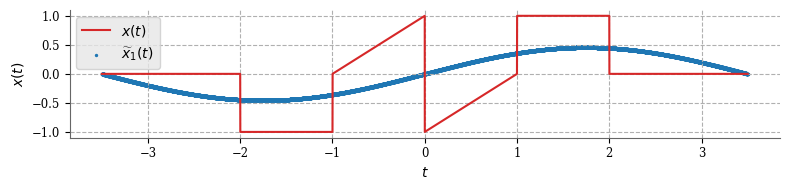

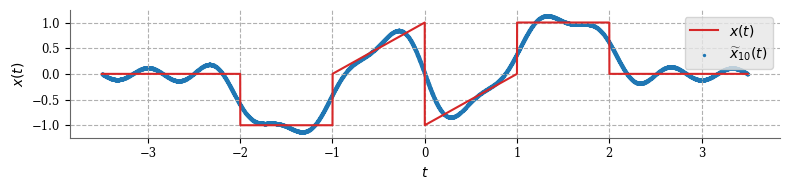

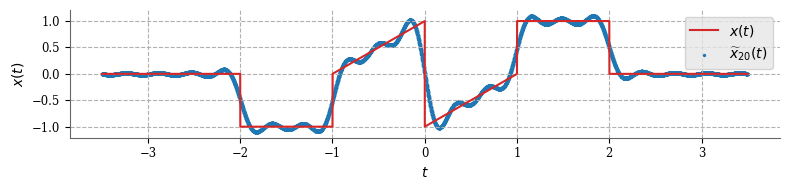

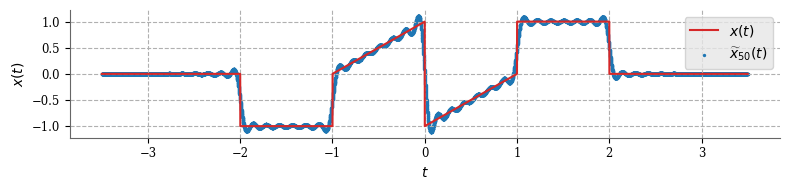

In [5]:
# N = 1
plt.plot(t, x_t, color='tab:red', label='$x(t)$')
plt.scatter(x=t, y=x1.real, s=2, color='tab:blue', label='$\widetilde{x}_{1} (t)$ ')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid(True)
plt.legend()
plt.show()

# N = 10
plt.plot(t, x_t, color='tab:red', label='$x(t)$')
plt.scatter(x=t, y=x10.real, s=2, color='tab:blue', label='$\widetilde{x}_{10} (t)$')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid(True)
plt.legend()
plt.show()

# N = 20
plt.plot(t, x_t, color='tab:red', label='$x(t)$')
plt.scatter(x=t, y=x20.real, s=2, color='tab:blue', label='$\widetilde{x}_{20} (t)$')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid(True)
plt.legend()
plt.show()

# N = 50
plt.plot(t, x_t, color='tab:red', label='$x(t)$')
plt.scatter(x=t, y=x50.real, s=2, color='tab:blue', label='$\widetilde{x}_{50} (t)$')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid(True)
plt.legend()
plt.show()

Item c) Potência média do erro $P_N$.

In [6]:
def potencia_media_erro(x_original, x_aprox):
    err = (x_original - x_aprox)**2
    P_N = np.mean(err)  # Aproximação discreta da integral
    return P_N

P_1 = potencia_media_erro(x_t, x1)
P_10 = potencia_media_erro(x_t, x10)
P_20 = potencia_media_erro(x_t, x20)
P_50 = potencia_media_erro(x_t, x50)

print(f'Potência média do erro para N = 1: {P_1}')
print(f'Potência média do erro para N = 10: {P_10}')
print(f'Potência média do erro para N = 20: {P_20}')
print(f'Potência média do erro para N = 50: {P_50}')

Potência média do erro para N = 1: (0.2767653611529634+0j)
Potência média do erro para N = 10: (0.04037836598957219-7.69955352444065e-20j)
Potência média do erro para N = 20: (0.019391980399077604-5.604020146655687e-20j)
Potência média do erro para N = 50: (0.008216140378160625-2.758788135161333e-20j)


Item d) Representação gráfica do módulo dos coeficientes $a_k$ em função de $\omega = k \omega_0$, para $N=50$.

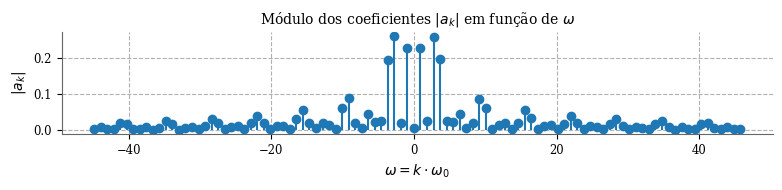

In [9]:
N = 50
omega = np.linspace(-(N), (N+1), 2*N) * omega_0
a_k = ((1/T) * (-2j *(np.sin(omega) + omega*np.cos(omega)*(1-2*np.cos(omega)))) / (omega)**2)
a_k = np.abs(a_k)

plt.stem(omega, a_k.real, basefmt=" ")
plt.title(r'Módulo dos coeficientes $|a_k|$ em função de $\omega$')
plt.xlabel(r'$\omega = k \cdot \omega_0$')
plt.ylabel(r'$|a_k|$')
plt.grid(True)
plt.show()